# Clustering

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
samples = pd.read_csv('seeds.csv', header=None)
samples = samples.iloc[:,range(0,7)]

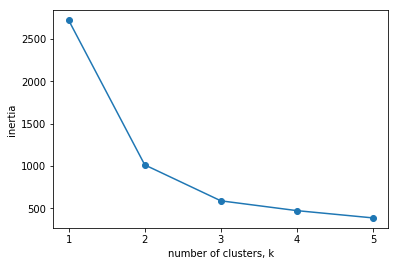

In [25]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

samples = pd.read_csv('fish.csv', header=None)
samples.columns = ['species', 'weight', 'length1', 'length2', 'length3', 'height', 'width']
species = samples['species']
samples = samples.drop('species',axis=1)

# Create pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

# Calculate the cluster labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns
df = pd.DataFrame({'labels': labels, 'species': species})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            1     0     19      1
2            0    17      0      0
3            0     0      0     13


In [27]:
from sklearn.preprocessing import Normalizer

movements = pd.read_csv('stocks.csv')
companies = movements.iloc[:,0].values.tolist()
movements = np.array(movements.drop(movements.columns[[0]], axis=1))

normalizer = Normalizer()
kmeans = KMeans()
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels').head())

    labels        companies
0        0            Apple
33       0        Microsoft
17       0  Google/Alphabet
14       0             Dell
11       0            Cisco


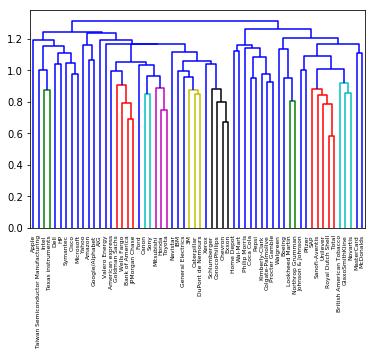

In [28]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Normalize the movements
normalized_movements = normalize(movements)

# Calculate the linkage
mergings = linkage(normalized_movements, method="complete")

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


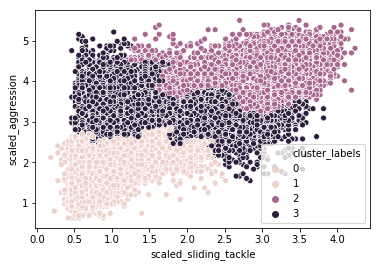

In [29]:
from scipy.cluster.vq import whiten

fifa = pd.read_csv('fifa_18_dataset.csv')
# Scale data
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle',
            'scaled_aggression', 
            'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

(169, 269, 3)


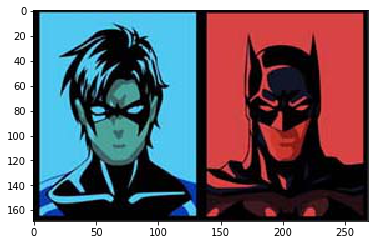

In [14]:
# Import image class of matplotlib
import matplotlib.image as img
from scipy.cluster.vq import kmeans

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
plt.imshow(batman_image)
print(batman_image.shape)

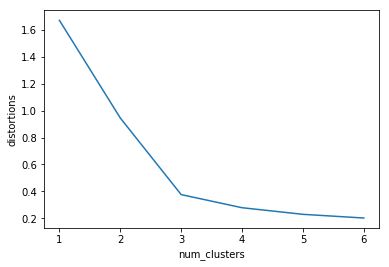

Most dominant colors in image:


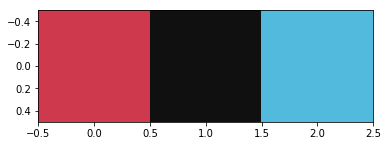

In [22]:
r,g,b = [],[], []
# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

batman_df = pd.DataFrame({'red': r, 'green': g, 'blue':b})
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_green'] = whiten(batman_df['green'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# retain 3 clusters
cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors =[]
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255))

# Display colors of cluster centers
print("Most dominant colors in image:")
plt.imshow([colors])
plt.show()